<font color=4EA770><h1><b>EDA</b></h1></font>

<h4>We are looking to solve some questions from our data using tools such (python-notebooks, SQL_DB, Power Bi)</h4>
</h4> And do the following visualizations</h4>

- Hires by technology (pie chart)
- Hires by year (horizontal bar chart)
- Hires by seniority (bar chart)
- Hires by country over years (USA, Brazil, Colombia and Ecuador only) (multiline chart)

---

---

<font color=#3498DB><h5>Preprocess</h5></font>

- <p>import own libraries</p>
- <p>import python libraries</p>

In [4]:
import sys
sys.path.append(r"../../Sql_connection")
import postgres_connect #that library is for connect with my postgres database using the engine(connector) of sql_alchemy 

In [5]:
from decouple import config
from matplotlib import gridspec
import numpy as np #for math
import pandas as pd #for data handle 
import matplotlib.pyplot as plt #for viz
import re

**we created the table before using the Pre_load file**
- first we need to know our data in the precleaned table

In [5]:
get_all_data = f"SELECT * FROM {config("DB_TABLE1")}" #The query to get the data for the pd dataframe
raw_dataset = pd.read_sql(get_all_data, con=postgres_connect.connection())
raw_dataset


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [34]:
raw_dataset.keys()

Index(['First Name', 'Last Name', 'Email', 'Application Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code Challenge Score',
       'Technical Interview Score'],
      dtype='object')

**Let's start looking for problems in the data such null_values duplicates and outliers**


In [7]:
raw_dataset.info()
#we see what we don't have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


---

**Looking for duplicates**

In [14]:
#look for duplicates in the Email column
print(len(raw_dataset.Email.unique()))

49833


In [25]:
duplicate_emails = raw_dataset[raw_dataset.duplicated(subset=['Email'], keep=False)]['Email'].unique()

print("(10) duplicate_email:", end=" ")
for i in range(11):
    print("[" + duplicate_emails[i],end="")
    print("]")

print("\nDuplicate emails = " + f"{len(duplicate_emails)}")

#We saw what looks like there are the same person multiple times

(10) duplicate_email: [matilda17@gmail.com]
[dewayne50@gmail.com]
[sandra83@gmail.com]
[kadin0@gmail.com]
[ilene47@hotmail.com]
[madeline12@gmail.com]
[georgiana11@gmail.com]
[valerie55@gmail.com]
[erling.king@yahoo.com]
[ettie29@gmail.com]
[vern44@hotmail.com]

Duplicate emails = 165


In [27]:
raw_dataset[raw_dataset.Email.isin(duplicate_emails)]

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
37,Grayce,Boyer,matilda17@gmail.com,2019-01-07,Taiwan,27,Intern,Development - FullStack,8,0
42,River,Erdman,dewayne50@gmail.com,2019-12-02,Bosnia and Herzegovina,4,Lead,Security Compliance,3,6
386,Kailee,Konopelski,sandra83@gmail.com,2021-11-24,Cook Islands,17,Senior,Sales,6,8
456,Clemmie,Gleason,kadin0@gmail.com,2018-06-15,Greenland,24,Mid-Level,Social Media Community Management,10,2
470,Lelia,Nienow,ilene47@hotmail.com,2022-05-31,Syrian Arab Republic,4,Senior,Business Intelligence,10,9
...,...,...,...,...,...,...,...,...,...,...
49237,Katlyn,Moore,stephen39@yahoo.com,2018-03-29,Guernsey,23,Trainee,Business Analytics / Project Management,5,6
49819,Kaylin,Hills,alejandra17@hotmail.com,2019-02-24,Iceland,21,Architect,Development - FullStack,2,9
49828,Mozelle,O'Connell,fiona72@hotmail.com,2019-12-08,Montenegro,30,Senior,Development - Frontend,7,5
49905,Mark,Rippin,callie59@hotmail.com,2022-01-26,Bhutan,0,Architect,Security Compliance,8,4


In [31]:
for i in range(4):
    print(raw_dataset[raw_dataset.Email == duplicate_emails[i]])

      First Name Last Name                Email Application Date   Country  \
37        Grayce     Boyer  matilda17@gmail.com       2019-01-07    Taiwan   
29473       Milo  Emmerich  matilda17@gmail.com       2021-11-20  Cambodia   

       YOE  Seniority               Technology  Code Challenge Score  \
37      27     Intern  Development - FullStack                     8   
29473   22  Mid-Level  Database Administration                     2   

       Technical Interview Score  
37                             0  
29473                          0  
      First Name Last Name                Email Application Date  \
42         River    Erdman  dewayne50@gmail.com       2019-12-02   
32775     Jannie   Denesik  dewayne50@gmail.com       2020-01-05   

                      Country  YOE Seniority  \
42     Bosnia and Herzegovina    4      Lead   
32775              Guadeloupe   17    Junior   

                              Technology  Code Challenge Score  \
42                   Securi

We observe that although it is the same email, they are different people, this may be due to the fact that the data is synthetic.

---

In [32]:
#now we can see the distribution of the data
raw_dataset.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


With this first approach we can observe that those have the posibility to be hired are over the Q2 or fifty porcent of the people
& there are no weird values on these columns

---

finally we will search weird values in date column

In [39]:
date_transform = pd.to_datetime(raw_dataset['Application Date']).dt.strftime(r'%Y%m%d')
date_transform = date_transform.astype(int)

In [47]:
print(f"""
Min Date : {date_transform.min()}
Max Date : {date_transform.max()}
""")


Min Date : 20180101
Max Date : 20220704



all looks good 🤓

---

# Create the dataframe with the hired column 

In [51]:
def determine_hire_state(row):
    if row['Code Challenge Score'] >= 7 and row['Technical Interview Score'] >= 7:
        return 1
    else:
        return 0

In [54]:
#create the atribute hired and use the new dataset with the hired colum 
hired_table = raw_dataset.copy() #copy the original dataset
hired_table["Hired"] = hired_table.apply(determine_hire_state, axis=1).astype(int) #add the colum with the constraint
hired_table.head()


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


**load the data in postgres and read again**

In [55]:
hired_table.to_sql(f"{config("DB_TABLE2")}", con=postgres_connect.connection(), if_exists="replace", index=False) #load into postgres

1000

In [6]:
get_all_data_hired = f"SELECT * FROM {config("DB_TABLE2")}" #The query to get the data for the pd dataframe
hired_dataset = pd.read_sql(get_all_data_hired, con=postgres_connect.connection())

In [4]:
hired_dataset

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1,0
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2,0
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1,0
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0,0


In [32]:
hired_dataset.Hired.value_counts()

Hired
0    43302
1     6698
Name: count, dtype: int64

---

**Well all dataset looks clean we can do the visualizations now**
<p>first the requirements</p>

- Hires by technology (pie chart)
- Hires by year (horizontal bar chart)
- Hires by seniority (bar chart)
- Hires by country over years (USA, Brazil, Colombia and Ecuador only) (multiline chart)



<center> <font color=#3498DB><h2>Visualizations</h2></font>  <h2>📊</h2> </center>

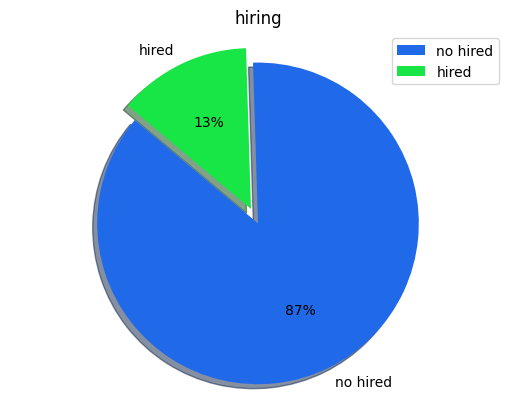

In [31]:
fig, ax = plt.subplots()
colors=["#2069E8","#18E546"] #set the colors for the pie
explode = (0.1,0) #move the slide 
ax.pie(hired_dataset.Hired.value_counts(), labels=["no hired", "hired"], colors=colors, autopct=lambda p: '{:.0f}%'.format(p), startangle=140, explode=explode, shadow=True)
ax.axis("equal") # secure the graph to be circular
ax.set_title("hiring") 
ax.legend(loc="best")
plt.show()

**Pie chart**  <font color=red>hired vs no hired</font>

---

In [7]:
hby = pd.to_datetime(hired_dataset["Application Date"],format="%Y-%m-%d")#change the format for extract the year in each register
hired_dataset["Year"] = hby.dt.year #create the column year and set just the year from the column Application Date
hires_by_year = hired_dataset.groupby("Year").size() #group by year and get the unique values from this column
is_hire = hired_dataset[hired_dataset["Hired"]==1] #create the dataset when just have the registers where they are hired
hires_by_year_hired = is_hire.groupby("Year").size()

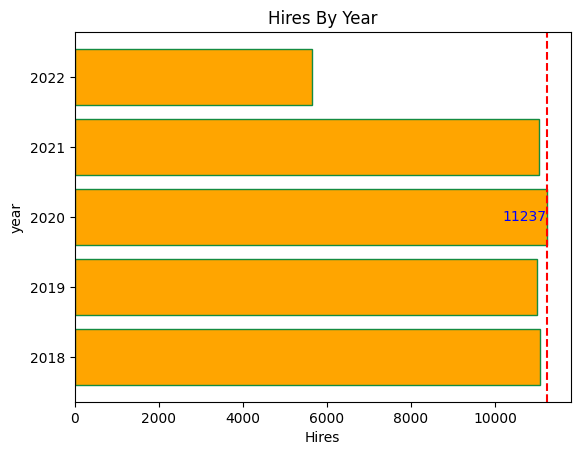

In [6]:
fig, ax = plt.subplots()
max_year = hires_by_year.idxmax()
max_hires = hires_by_year.max()
ax.barh(hires_by_year.index, hires_by_year.values, color="orange", edgecolor="#148B41")
ax.set_ylabel("year")
ax.set_xlabel("Hires")
ax.set_title("Hires By Year")
ax.autoscale()
ax.axvline(max_hires, color='red', linestyle='--')
ax.text(max_hires, max_year, f'{max_hires}', va='center', ha='right', color='blue')
plt.show()

In [8]:
is_hire = hired_dataset[hired_dataset["Hired"]==1]
hires_by_year_hired = is_hire.groupby("Year").size()

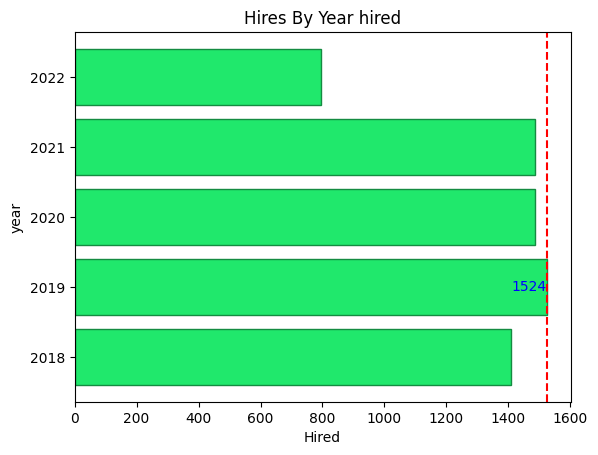

In [9]:
fig, ax = plt.subplots()
max_year_hired = hires_by_year_hired.idxmax()
max_hires_hired = hires_by_year_hired.max()
ax.barh(hires_by_year_hired.index, hires_by_year_hired.values, color="#20E86C", edgecolor="#148B41")
ax.set_ylabel("year")
ax.set_xlabel("Hired")
ax.set_title("Hires By Year hired")
ax.autoscale()
ax.axvline(max_hires_hired, color='red', linestyle='--')
ax.text(max_hires_hired, max_year_hired, f'{max_hires_hired}', va='center', ha='right', color='blue')
plt.show()

In [10]:
no_hire = hired_dataset[hired_dataset["Hired"]==0]
no_hires_by_year_hired = no_hire.groupby("Year").size()

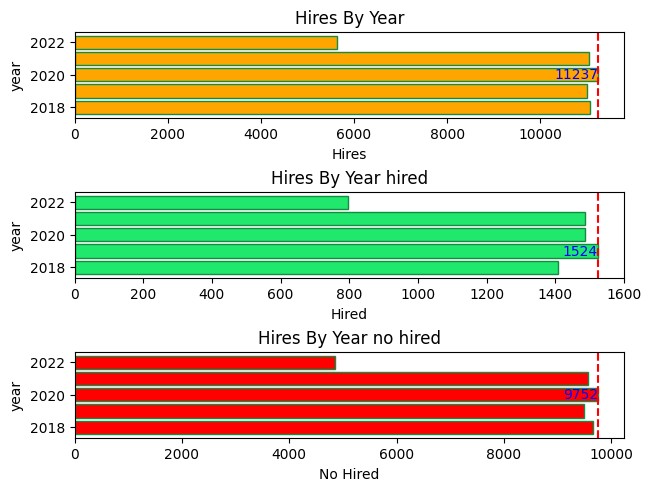

In [14]:
fig, ax = plt.subplots(3, layout='constrained')

max_year = hires_by_year.idxmax()
max_hires = hires_by_year.max()
ax[0].barh(hires_by_year.index, hires_by_year.values, color="orange", edgecolor="#148B41")
ax[0].set_ylabel("year")
ax[0].set_xlabel("Hires")
ax[0].set_title("Hires By Year")
ax[0].autoscale()
ax[0].axvline(max_hires, color='red', linestyle='--')
ax[0].text(max_hires, max_year, f'{max_hires}', va='center', ha='right', color='blue')

max_year_hired = hires_by_year_hired.idxmax()
max_hires_hired = hires_by_year_hired.max()
ax[1].barh(hires_by_year_hired.index, hires_by_year_hired.values, color="#20E86C", edgecolor="#148B41")
ax[1].set_ylabel("year")
ax[1].set_xlabel("Hired")
ax[1].set_title("Hires By Year hired")
ax[1].autoscale()
ax[1].axvline(max_hires_hired, color='red', linestyle='--')
ax[1].text(max_hires_hired, max_year_hired, f'{max_hires_hired}', va='center', ha='right', color='blue')

no_max_year_hired = no_hires_by_year_hired.idxmax()
no_max_hires_hired = no_hires_by_year_hired.max()
ax[2].barh(no_hires_by_year_hired.index, no_hires_by_year_hired.values, color="red", edgecolor="#148B41")
ax[2].set_ylabel("year")
ax[2].set_xlabel("No Hired")
ax[2].set_title("Hires By Year no hired")
ax[2].autoscale()
ax[2].axvline(no_max_hires_hired, color='red', linestyle='--')
ax[2].text(no_max_hires_hired, no_max_year_hired, f'{no_max_hires_hired}', va='center', ha='right', color='blue')


plt.show()

We can say that the average of hired is around 10% and our year with more number of hired was 2021 although our year with more applicants was 2020

**Horizontal_Bars** <font color=red><p>hires - hires_hired - hires_no_hired</p></font>

---

In [9]:
hired_by_seniority = hired_dataset.groupby("Seniority").size()
hired_by_seniority_h = is_hire.groupby("Seniority").size()
hired_by_seniority

Seniority
Architect    7079
Intern       7255
Junior       7100
Lead         7071
Mid-Level    7253
Senior       7059
Trainee      7183
dtype: int64

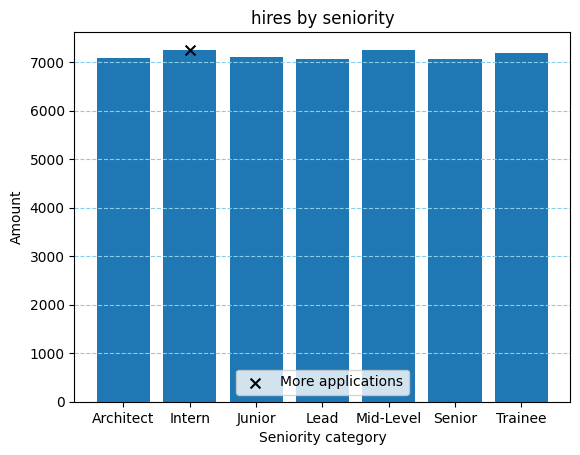

In [22]:
fig, ax = plt.subplots()

ax.bar(hired_by_seniority.index, hired_by_seniority.values)
ax.set_title("hires by seniority")
ax.set(xlabel="Seniority category", ylabel="Amount")
ax.grid(True, axis="y", linestyle="--", color="skyblue")
ax.scatter(hired_by_seniority.idxmax(),hired_by_seniority.max(), marker="x", color="black", s=50, label="More applications")
ax.legend(loc="lower center")
plt.show()

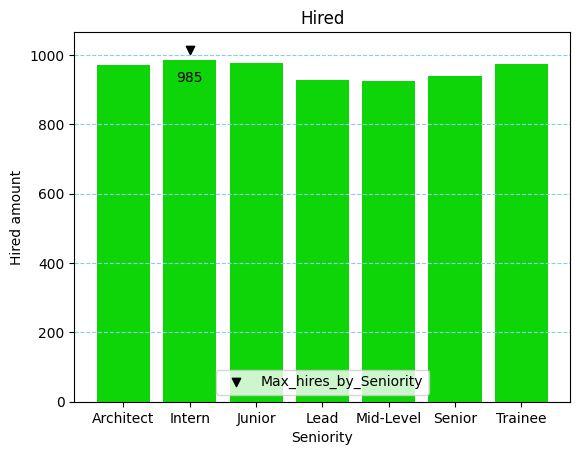

In [24]:
fig, ax = plt.subplots()
ax.bar(hired_by_seniority_h.index, hired_by_seniority_h.values, color="#0ED507")
ax.set(xlabel="Seniority", ylabel="Hired amount")
ax.set_title("Hired")
ax.grid(True, axis="y", color="skyblue", linestyle="--")
ax.text(hired_by_seniority_h.idxmax(),hired_by_seniority_h.max()-50,f"{hired_by_seniority_h.max()}", va="center", ha="center")
ax.scatter(x=hired_by_seniority_h.idxmax(), y=hired_by_seniority_h.max()+30, marker="v", color="black", label="Max_hires_by_Seniority")
ax.legend(loc="lower center")
plt.show()


C:\Users\joanm\AppData\Local\Temp\ipykernel_49480\2605527097.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


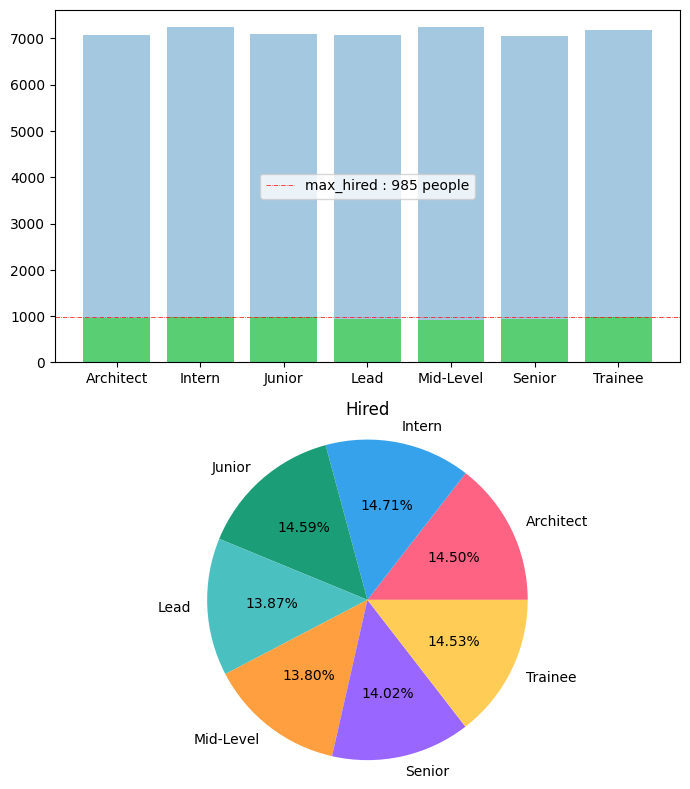

In [98]:
fig, ax = plt.subplots(2, layout="constrained", figsize=(7,8))
ax[0].bar(hired_by_seniority.index,hired_by_seniority.values, alpha=0.4)
ax[0].bar(hired_by_seniority_h.index, hired_by_seniority_h.values, color="#0ED507", alpha=0.5)
ax[0].axhline(y=hired_by_seniority_h.max(), linestyle="-.", linewidth=0.5, color ="red",label=f"max_hired : {hired_by_seniority_h.max()} people")
ax[0].legend(loc="center")

colors=["#ff6384", "#36a2eb", "#1b9e77", "#4bc0c0", "#ff9f40", "#9966ff", "#ffcd56"]
ax[1].pie(hired_by_seniority_h, labels=hired_by_seniority.index, autopct=lambda p: '{:.2f}%'.format(p), colors=colors)
ax[1].axis("equal")
ax[1].set_title("Hired")
fig.tight_layout()
plt.show()



In [103]:
print( f"skewnes = {hired_by_seniority_h.skew():.2f}")

skewnes = -0.37


How we can see our skewness is slow and how we can see at the pie chart the data is very similar but we can see they hire more people with this seniority [junior, intern, architect, trainee] and its less likely to be hired if you are mid-level
🤧

In [12]:
hired_dataset.Country.unique()

array(['Norway', 'Panama', 'Belarus', 'Eritrea', 'Myanmar', 'Zimbabwe',
       'Wallis and Futuna', 'Italy', 'Timor-Leste', 'Armenia',
       'French Southern Territories', 'Chad', 'El Salvador', 'Mozambique',
       'Brunei Darussalam', 'Morocco', 'Saint Helena', 'Portugal',
       'Central African Republic', 'Seychelles', 'Dominica', 'Finland',
       'Belgium', 'Niue', 'Japan', 'Palestinian Territory',
       'Faroe Islands', 'Latvia', 'Saudi Arabia', 'Poland', 'Micronesia',
       'Macao', 'Bangladesh', 'Taiwan', 'Slovakia (Slovak Republic)',
       'Mexico', 'Nigeria', 'Guadeloupe', 'Bosnia and Herzegovina',
       'Guyana', 'Croatia', 'Svalbard & Jan Mayen Islands', 'Yemen',
       'Ukraine', 'Zambia', 'Paraguay', 'Puerto Rico', 'Madagascar',
       'Bulgaria', 'Jersey', 'French Polynesia',
       'United States of America', 'Mali', 'Anguilla',
       'Holy See (Vatican City State)', 'Andorra', 'Republic of Korea',
       'Turkey', 'Heard Island and McDonald Islands', 'Malta',
  

In [23]:
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']#Create a list with the values to graph

hired_by_country = hired_dataset[hired_dataset.Country.isin(countries_of_interest)]#filter by these countries
hired_by_country_h = hired_by_country[hired_by_country.Hired == 1]#Second filter with hired_people



In [124]:
hired_by_country.shape

(821, 12)

In [125]:
hired_by_country_h.shape

(103, 12)

In [20]:
hired_by_country.describe()
#identify the distribution of our data 

,YOE,Code Challenge Score,Technical Interview Score,Hired,Year
count,821.000000,821.000000,821.000000,821.000000,821.000000
mean,15.684531,4.887942,4.890378,0.125457,2019.766139
std,8.741079,3.184890,3.181527,0.331438,1.295912
min,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,8.000000,2.000000,2.000000,0.000000,2019.000000
50%,16.000000,5.000000,5.000000,0.000000,2020.000000
75%,23.000000,8.000000,8.000000,0.000000,2021.000000
max,30.000000,10.000000,10.000000,1.000000,2022.000000


In [24]:
hired_by_country_h.describe()

,YOE,Code Challenge Score,Technical Interview Score,Hired,Year
count,103.000000,103.000000,103.000000,103.0,103.000000
mean,15.640777,8.339806,8.699029,1.0,2019.825243
std,8.262666,1.107491,1.170176,0.0,1.324188
min,1.000000,7.000000,7.000000,1.0,2018.000000
25%,10.500000,7.000000,8.000000,1.0,2019.000000
50%,15.000000,8.000000,9.000000,1.0,2020.000000
75%,22.000000,9.000000,10.000000,1.0,2021.000000
max,30.000000,10.000000,10.000000,1.0,2022.000000


We see that the distribution of the values at hired column look's dissapointing because only over de Q3 (75%) of people in our countries been hired but this have sense with the last question where we saw that the % of hires is around 10% of applications 

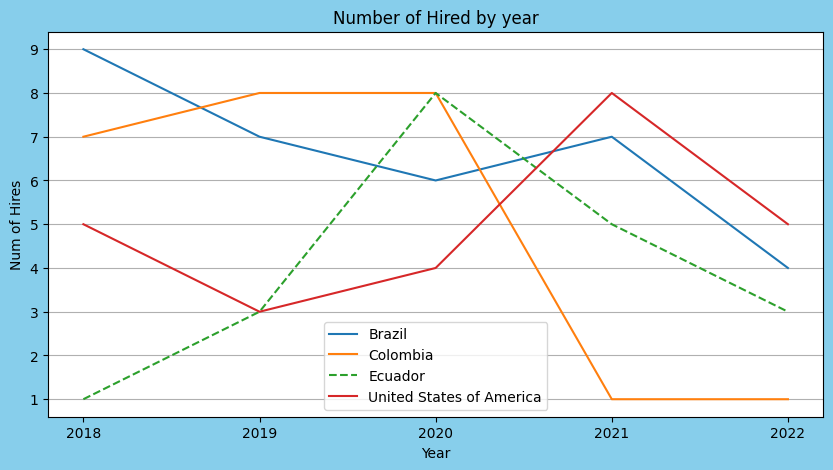

In [121]:
grouped = hired_by_country_h.groupby(['Year', 'Country']).sum().reset_index()
sl = {"Ecuador":"--"}
fig , ax = plt.subplots(figsize=(10,5))
for country in grouped['Country'].unique():
    country_data = grouped[grouped['Country'] == country]
    ax.plot(country_data['Year'], country_data['Hired'], label=country, linestyle='--' if country == 'Ecuador' else '-')
ax.set_xlabel('Year')
ax.set_ylabel("Num of Hires")
ax.set_title('Number of Hired by year')
ax.legend()
ax.set_xticks(grouped['Year'].unique())
ax.grid(True, axis="y")
fig.set_facecolor("skyblue")
plt.show()

We can see that the vest year for the latin community was the 2020 but after that the people who be hired at this countries down but the next year was the best year for USA

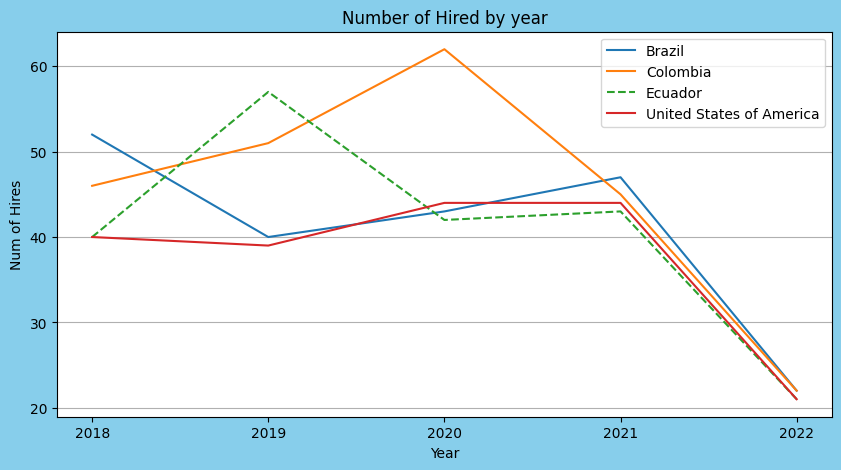

In [130]:
grouped = hired_by_country.groupby(['Year', 'Country']).count().reset_index()
sl = {"Ecuador":"--"}
fig , ax = plt.subplots(figsize=(10,5))
for country in grouped['Country'].unique():
    country_data = grouped[grouped['Country'] == country]
    ax.plot(country_data['Year'], country_data['Hired'], label=country, linestyle='--' if country == 'Ecuador' else '-')
ax.set_xlabel('Year')
ax.set_ylabel("Num of Hires")
ax.set_title('Number of Hired by year')
ax.legend()
ax.set_xticks(grouped['Year'].unique())
ax.grid(True, axis="y")
fig.set_facecolor("skyblue")
plt.show()

 Finally we can see that the drop in the number of hiring of Latinos is not due to a lower number of applicants, since we see that the number of applicants is very similar in 2021 to that of the United States, then was because on average they would have lower returns than necessary. and therefore it would not be enough for them to be hire

<center><h1>🐼</h1></center>